In [304]:
import scipy
from scipy import sparse
import numpy as np 
import numba as nb
from scipy.sparse import linalg as LA
from matplotlib.pyplot import imshow, matshow

## Define the operators

Define the operators which comprise the Hamiltonian.

In [4]:
# define operators

Sz = np.array([[1, 0], [0, -1]], dtype=np.int8)
Sx = np.array([[0, 1], [1, 0]], dtype=np.int8)
Sy = np.array([[0, -1j], [1j, 0]])

Sp = np.array([[0, 1], [0, 0]], dtype=np.int8)
Sm = np.array([[0, 0], [1, 0]], dtype=np.int8)
Id = np.array([[1, 0], [0, 1]], dtype=np.int8)

_ops = {'x': Sx, 'y': Sz, 'z': Sz, '+': Sp, '-': Sm, 'I': Id}

## The basic idea of the Hamiltonian construction

In [392]:
neki = [[1,2, 3]]

isinstance(neki[0], np.ndarray)

False

## Define the model parameters

In [1]:

# chain length
L = 5

# define exchange coupling array
J1 = -0.5 
J_zz = [[J1, i, (i+1)] for i in range(L-1)]

In [412]:
# construct a simple ising modee

def construct_ham(operator, coupling_list, L):
    
    ham = 0 * sparse.eye(2**L)
    for i, elt in enumerate(coupling_list):
        temp = sparse.eye(1)
        elt[1:] = np.sort(elt[1:])
        
        dims = np.diff(elt[1:]) - 1
        
        # take care of the boundaries / preceeding / suceeding operators
        dims = np.insert(dims, 0, elt[1])
    
        dims = np.append(dims, L - 1 - elt[-1])
        
        eyes = [sparse.eye(2**dim) for dim in dims]
        

        for eye in eyes[:-1]:
            temp_ = sparse.kron(eye, operator)
            
            temp = sparse.kron(temp, temp_)
        temp = sparse.kron(temp, eyes[-1])
    
        ham += temp
    
    return ham
    

In [413]:
%%time

ham = 0. * sparse.eye(2**L)

ham += construct_ham(Sx, J_zz, L )

ham += construct_ham(Sy, J_zz, L )

ham += construct_ham(Sz, J_zz, L)

ham

CPU times: user 51.6 ms, sys: 3.7 ms, total: 55.3 ms
Wall time: 64.9 ms


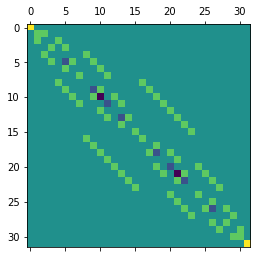

In [414]:
matshow(np.real(ham.todense()))

In [396]:
set(list('xzz')).issubset(_ops.keys())

True

In [398]:
J_zz

[[-0.5, 0, 1],
 [-0.5, 1, 2],
 [-0.5, 2, 3],
 [-0.5, 3, 4],
 [-0.5, 4, 5],
 [-0.5, 5, 6],
 [-0.5, 6, 7],
 [-0.5, 7, 8],
 [-0.5, 8, 9],
 [-0.5, 9, 10],
 [-0.5, 10, 11],
 [-0.5, 11, 12],
 [-0.5, 12, 13],
 [-0.5, 13, 14],
 [-0.5, 14, 15],
 [-0.5, 15, 16],
 [-0.5, 16, 17]]

In [401]:
np.asarray(J_zz).shape[1]

3